# Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Loading the dataset¶

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape


(200, 5)

In [5]:
# statistical info
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#getting information abt the data types of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#checking if any null value
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Data Cleaning

<AxesSubplot:>

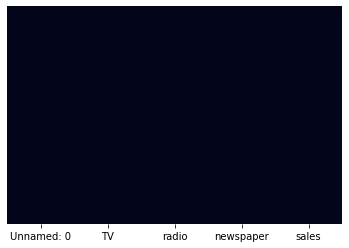

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False )

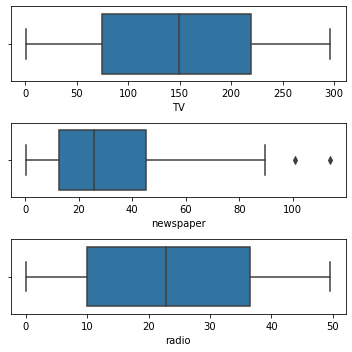

In [9]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

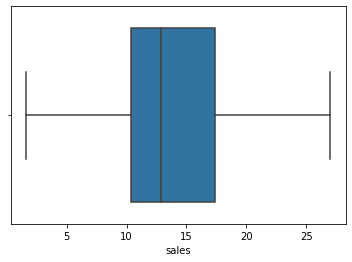

In [10]:
sns.boxplot(df['sales'])
plt.show()

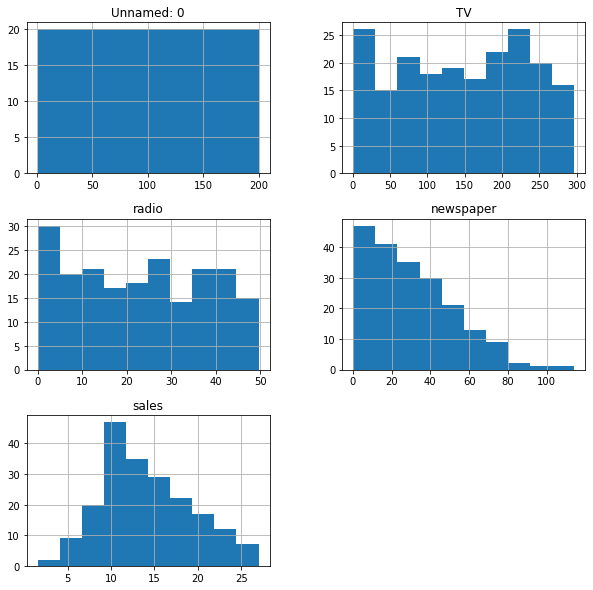

In [11]:
# to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

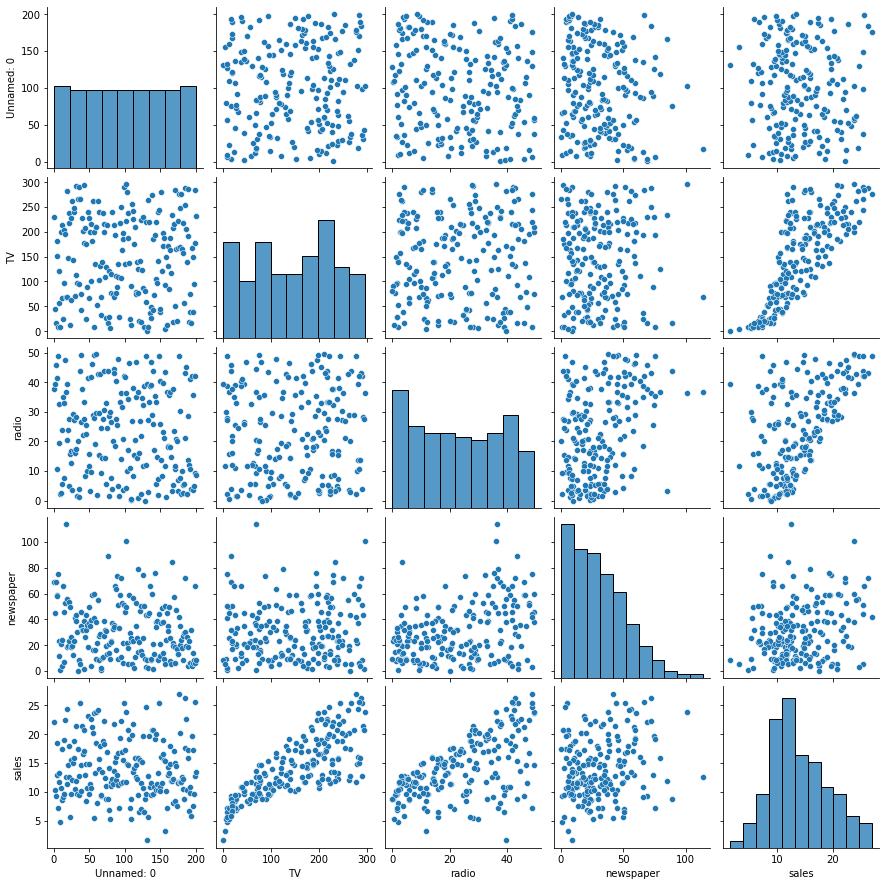

In [12]:
sns.pairplot(df, size=2.5)
plt.show()

<AxesSubplot:>

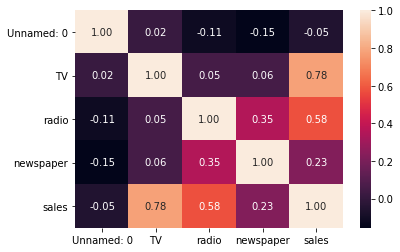

In [13]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

# Data Preprocessing

In [14]:
### Define X&Y ###

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

# Model Training

In [16]:
regressor = LinearRegression( fit_intercept = True)

regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.00064359 0.04471835 0.18925118 0.00304577]
Intercept : 2.9065270863617965


# Model Prediction

In [18]:
y_pred = regressor.predict(X_test)

# Metrices

In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.788576100865965


In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8986489151417082

# Tuning¶
Estimate the relevancy of the coefficients

Now that you have coefficients, how can you tell if they are relevant to predict your target?

The best way is to find the p-value. The p-value is used to quantify statistical significance; it allows to tell whether the null hypothesis is to be rejected or not.

The null hypothesis?

For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

So, finding the p-value for each coefficient will tell if the variable is statistically significant to predict the target. As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the variable and the target.

In [22]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           3.94e-95
Time:                        21:38:50   Log-Likelihood:                -386.14
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0052      0.394      7.623      0.0

P value

Looking at all coefficients, we have a p-value that is very low (although it is probably not exactly 0) for TV and Radio. This means that there is a strong correlation between these coefficients and the target (Sales).

Of course, we notice that the third coefficient (the one for newspaper) has a large p-value 0.954. Therefore, ad spending on newspaper is not statistically significant. Removing that predictor would slightly reduce the R² value, but we might make better predictions.

R² value and Adj. R² value

Then, looking at the R² value and Adj. R² value, we have 0.9. Therefore, about 90% of the variability of sales is explained by the amount spent on all ads

F-statistic

This is a good indicator of whether there is a relationship between Y and X. The further our F-statistic is away from 1, the better our regression model.The F-statistic is 605.4. This is much greater than 1, and since our data set if fairly small (only 200 data points), it demonstrates that there is a strong relationship between ad spending and sales.

std error

The coefficient standard error, as mentioned above, measures how much our coefficient estimates vary from the actual average value of our response variable. In other words, it measures the accuracy of coefficient estimates. The closer our standard error is to zero, the better.

t-value

The coefficient t-value measures how far (in standard deviations) our coefficient estimate is from 0. A large t-value, relative to standard error, would provide evidence against the null hypothesis and indicate that a relationships exists between the predictor and response variables. Predictors with low t-statistics can be dropped. Ideally, the t-value should be greater than 1.96 for a p-value to be less than 0.05.

In [23]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.show()

ValueError: continuous format is not supported

# MOdel saving

In [25]:
import pickle
filename='Advertising Sales Channel Prediction'
pickle.dump(regressor,open(filename,'wb'))